# Pandas 

O pacote *pandas* é uma das ferramentas de *Python* mais importantes para cientistas e analistas de dados atualmente. Ele é a base da maior parte dos projetos que incluem leitura, manipulação, limpeza e escrita de dados. O nome *pandas* é derivado do termo *panel data* (dados em painel), que é um termo econométrico que descreve dados compostos de múltiplas observações através do tempo para os mesmos indivíduos.

*Pandas* foi desenvolvido como uma camada acima do *NumPy*, mas boa parte de suas funcionalidades de análise estatística são feitas pelo *SciPy*, além do uso do *Matplotlib* para funções de visualização. Dessa forma, *pandas* simplifica o uso de diversas bibliotecas úteis para estatísticos e cientistas de dados.

Os dois principais objetos de *pandas* são as séries (*Series*) e as tabelas (*DataFrame*). Uma *Series* é basicamente uma coluna, enquanto uma *DataFrame* é uma tabela multidimensional composta de uma coleção de Series. Exemplo:

In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

A Series acima foi criada por meio de uma lista de valores, incluindo o valor *NaN* (*not a number*), que equivale a uma posição nula. A lista de valores foi passada para o construtor *pd.Series* e *pandas* criou um índice númerico para cada linha e determinou o tipo de  que melhor se representaria os dados (*float64*). Note que todos os valores passados foram inteiros, menos o *NaN*, cujo valor é tratado como *float64*. A criação de *DataFrames* também é muito simples, porém muito versátil. No exemplo abaixo, criamos uma *DataFrame* composta por uma matriz de inteiros. Após a chamada ao construtor *pd.DataFrame*, *pandas* cria um índice númerico para cada linha e atribui um número como título de cada coluna.

In [3]:
pd.DataFrame(np.arange(12).reshape(4, 3))

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Podemos passar mais informações ao construtor da *DataFrame*, como um nome para cada coluna:

In [4]:
pd.DataFrame(
    np.arange(12).reshape(4, 3),
    columns=['A', 'B', 'C']
)

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Podemos também criar um índice customizado para cada linha. Por exemplo, vamos criar um índice com um intervalo de datas:

In [5]:
dates = pd.date_range(
    '20200101', periods=4
)  # experimente trocar a string da data por 'today'

pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

,A,B,C
2020-01-01,0,1,2
2020-01-02,3,4,5
2020-01-03,6,7,8
2020-01-04,9,10,11


Uma outra forma de criar uma *DataFrame* é passar um dicionário com objetos que podem ser convertidos a objetos do tipo *Series*.

In [6]:
df = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': list('abcd')
})

df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,a
1,1.0,2013-01-02,1.0,3,train,b
2,1.0,2013-01-02,1.0,3,test,c
3,1.0,2013-01-02,1.0,3,train,d


Note que as colunas resultantes tem tipos diferentes:

In [7]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Acessando os dados

O pacote oferece diversas formas de acessar os dados contidos em uma *DataFrame*. Por exemplo, para acessar as primeiras linhas, usa-se o método *head*:

In [8]:
df2 = pd.DataFrame(
    np.arange(200).reshape(40, 5),
    columns=list('ABCDE')
)

df2.head()

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


Se o método *head* for chamado sem parâmetro algum, ele irá retornar as cinco primeiras linhas da *DataFrame*. Caso receba um número inteiro, o método irá retornar a quantidade desejada.

In [9]:
df2.head(2)

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9


De forma similar, podemos acessar as últimas linhas da *DataFrame*:

In [10]:
df2.tail()

,A,B,C,D,E
35,175,176,177,178,179
36,180,181,182,183,184
37,185,186,187,188,189
38,190,191,192,193,194
39,195,196,197,198,199


In [11]:
df2.tail(3)

,A,B,C,D,E
37,185,186,187,188,189
38,190,191,192,193,194
39,195,196,197,198,199


Para listar o índice e as colunas:

In [12]:
df2.index

RangeIndex(start=0, stop=40, step=1)

In [13]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

Para verificar o formato da tabela, usa-se o atributo *shape*:

In [14]:
df2.shape

(40, 5)

O método *to_numpy* fornece uma representação dos dados na forma de um *array* de *NumPy*. Isso pode ser uma operação simples, caso os dados da *DataFrame* sejam homogêneos:

In [15]:
df2.to_numpy()

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34],
       [ 35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44],
       [ 45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64],
       [ 65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74],
       [ 75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94],
       [ 95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104],
       [105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124],
       [125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134],
       [135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144],
       [145, 1

No entanto, como *arrays* de *NumPy* devem ser homogêneos, no caso de *DataFrames* heterogêneas, a operação pode ser custosa, porque *pandas* vai precisar encontrar o tipo que melhorar representará todos os dados em um *array*. Por vezes, esse tipo pode terminar sendo *object*. 

In [16]:
df.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'a'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'b'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'c'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'd']],
      dtype=object)

Note que o índice e os nomes das colunas não aparecem na saída de *to_numpy*. Para transpor a *DataFrame*, basta accessar o atributo *T*:

In [17]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
A,0,5,10,15,20,25,30,35,40,45,...,150,155,160,165,170,175,180,185,190,195
B,1,6,11,16,21,26,31,36,41,46,...,151,156,161,166,171,176,181,186,191,196
C,2,7,12,17,22,27,32,37,42,47,...,152,157,162,167,172,177,182,187,192,197
D,3,8,13,18,23,28,33,38,43,48,...,153,158,163,168,173,178,183,188,193,198
E,4,9,14,19,24,29,34,39,44,49,...,154,159,164,169,174,179,184,189,194,199


Para acessar uma única coluna, retornada como uma *Series*, podemos usar notação de colchetes ou de atributo:

In [18]:
df['E']

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

In [19]:
df.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

Para acessar linhas pelos seus índices, podemos usar o atributo *loc*:

In [20]:
dates = pd.date_range(
    '20200101', periods=6
)

df3 = pd.DataFrame(
    np.arange(18).reshape(6, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

df3.loc[dates[0]]

A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int64

O atributo *loc* também permite acessar listas de índices, bem como especificar quais colunas devem ser retornadas:

In [21]:
df3.loc[[dates[2], dates[4]]]

,A,B,C
2020-01-03,6,7,8
2020-01-05,12,13,14


In [22]:
df3.loc[[dates[2], dates[4]], ['A', 'C']]

,A,C
2020-01-03,6,8
2020-01-05,12,14


Se apenas um índice e uma coluna forem especificados, *pandas* retornará o valor correspondente da tabela:

In [23]:
df3.loc[df3.index[0], 'B']

1

Note a diferença de comportamento se a única coluna for informada dentro de uma lista:

In [24]:
df3.loc[df3.index[0], ['B']]  # retorna uma Series com apenas um elemento

B    1
Name: 2020-01-01 00:00:00, dtype: int64

Para acessar apenas um valor de forma mais rápida, o atributo *loc* pode ser substituído por *at*:

In [25]:
df3.at[df3.index[0], 'B']

1

Similar ao *loc*, o atributo *iloc* também permite acessar os dados da *DataFrame*, porém ao invés de acessar através dos valores dos índices, ele permite acessar pelas posições das linhas. Exemplo:

In [26]:
df3.iloc[0]  # equivale a df3.loc[df3.index[0]]

A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int64

As colunas também são tratadas numericamente por *iloc*. Inclusive, é possível usá-lo para acessar fatias da tabela, assim como em um *array* de *NumPy*:

In [27]:
df3.iloc[0, [0, 2]]

A    0
C    2
Name: 2020-01-01 00:00:00, dtype: int64

In [28]:
df3.iloc[0, 0]

0

In [29]:
df3.iloc[0:2, 0:2]  # exclui o final

,A,B
2020-01-01,0,1
2020-01-02,3,4


Continuando as similaridades com *arrays*, também é possível acessar os dados de uma *DataFrame* usando condições booleanas:

In [30]:
df2[df2.A % 2 == 0]  # apenas as linhas em que a coluna A é par

,A,B,C,D,E
0,0,1,2,3,4
2,10,11,12,13,14
4,20,21,22,23,24
6,30,31,32,33,34
8,40,41,42,43,44
10,50,51,52,53,54
12,60,61,62,63,64
14,70,71,72,73,74
16,80,81,82,83,84
18,90,91,92,93,94


In [31]:
df2[df2 % 2 == 0]  # Apenas os valores pares

,A,B,C,D,E
0,0.0,NaN,2.0,NaN,4.0
1,NaN,6.0,NaN,8.0,NaN
2,10.0,NaN,12.0,NaN,14.0
3,NaN,16.0,NaN,18.0,NaN
4,20.0,NaN,22.0,NaN,24.0
5,NaN,26.0,NaN,28.0,NaN
6,30.0,NaN,32.0,NaN,34.0
7,NaN,36.0,NaN,38.0,NaN
8,40.0,NaN,42.0,NaN,44.0
9,NaN,46.0,NaN,48.0,NaN


O método *isin* permite filtrar dados:

In [32]:
df[df['F'].isin(['a', 'd'])]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,a
3,1.0,2013-01-02,1.0,3,train,d


Além de acessar dados, *loc*, *iloc*, *at* e *iat* permitem atribuir valores às posições indicadas:

In [33]:
df3.iloc[2] = 1

df3

,A,B,C
2020-01-01,0,1,2
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


In [34]:
df3.loc['20200101', 'C'] = 10

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


In [35]:
df3.iat[2, 2] = -5

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,-5
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


Também é possível usar máscaras booleanas para atribuir valores:

In [36]:
df2[df2 % 2 == 0] = -df2

df2

,A,B,C,D,E
0,0,1,-2,3,-4
1,5,-6,7,-8,9
2,-10,11,-12,13,-14
3,15,-16,17,-18,19
4,-20,21,-22,23,-24
5,25,-26,27,-28,29
6,-30,31,-32,33,-34
7,35,-36,37,-38,39
8,-40,41,-42,43,-44
9,45,-46,47,-48,49


Para adicionar uma nova coluna, basta usar a notação de colchetes com o nome da nova coluna:

In [37]:
df2['F'] = 1

df2

,A,B,C,D,E,F
0,0,1,-2,3,-4,1
1,5,-6,7,-8,9,1
2,-10,11,-12,13,-14,1
3,15,-16,17,-18,19,1
4,-20,21,-22,23,-24,1
5,25,-26,27,-28,29,1
6,-30,31,-32,33,-34,1
7,35,-36,37,-38,39,1
8,-40,41,-42,43,-44,1
9,45,-46,47,-48,49,1


## Estatística descritiva

O pacote *pandas* oferece diversas funções para análise de Estatística descritiva. A mais geral dessas funcionalidades é o método *describe*, que computa uma variedade de medidas:

In [38]:
df2.describe()

,A,B,C,D,E,F
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
std,114.718161,115.591012,116.466128,117.343458,118.222953,0.0
min,-190.000000,-196.000000,-192.000000,-198.000000,-194.000000,1.0
25%,-92.500000,-98.500000,-94.500000,-100.500000,-96.500000,1.0
50%,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
75%,97.500000,93.500000,99.500000,95.500000,101.500000,1.0
max,195.000000,191.000000,197.000000,193.000000,199.000000,1.0


É possivel selecionar os percentis que serão incluídos (a mediana é sempre retornada por padrão):

In [39]:
df2.describe(percentiles=[.05, .25, .75, .95])

,A,B,C,D,E,F
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
std,114.718161,115.591012,116.466128,117.343458,118.222953,0.0
min,-190.000000,-196.000000,-192.000000,-198.000000,-194.000000,1.0
5%,-170.500000,-176.500000,-172.500000,-178.500000,-174.500000,1.0
25%,-92.500000,-98.500000,-94.500000,-100.500000,-96.500000,1.0
50%,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
75%,97.500000,93.500000,99.500000,95.500000,101.500000,1.0
95%,175.500000,171.500000,177.500000,173.500000,179.500000,1.0
max,195.000000,191.000000,197.000000,193.000000,199.000000,1.0


Para colunas não-númericas, *describe* retorna um sumário mais simples:

In [40]:
df['E'].describe()

count         4
unique        2
top       train
freq          2
Name: E, dtype: object

Numa *DataFrame* com tipos mistos, *describe* irá incluir apenas as colunas numéricas:

In [41]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})

frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


Esse comportamento pode ser controlado pelos argumentos *include* e *exclude*:

In [42]:
frame.describe(include=['object'])

,a
count,4
unique,2
top,No
freq,2


In [43]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [44]:
frame.describe(include=['object', 'number'])

,a,b
count,4,4.000000
unique,2,NaN
top,No,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [45]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,No,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


Cada uma das funções separadas de estatística descritiva pode ser calculada para um dado eixo (*axis*), assim como *NumPy*:

In [46]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,0.236535,-0.166664,NaN
b,0.448442,1.539739,0.156513
c,-1.299610,-0.605028,-0.441041
d,NaN,1.323298,0.038783


In [47]:
df.mean(0)

one     -0.204878
two      0.522836
three   -0.081915
dtype: float64

In [48]:
df.mean(1)

a    0.034935
b    0.714898
c   -0.781893
d    0.681041
dtype: float64

Diferente de *NumPy*, se o eixo não for informado, o padrão é *axis=0* (*NumPy* calcula a média para o *array* todo).

In [49]:
df.mean()

one     -0.204878
two      0.522836
three   -0.081915
dtype: float64

Note que os valores *NaN* são descartados. Isso pode ser controlado pelo argumento *skipna*, que é *True* por padrão:

In [50]:
df.mean(0, skipna=False)

one           NaN
two      0.522836
three         NaN
dtype: float64

Combinando comportameto aritmético e *broadcasting*, é possível realizar operações estatísticas, como a padronização (média 0 e desvio 1), de forma concisa:

In [51]:
df_stand = (df - df.mean()) / df.std()

df_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [52]:
df_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)

df_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

Métodos como *cumsum* (soma acumulada) e *cumprod* (produto acumulado) preservam a posição de valores *NaN*:

In [53]:
df.cumsum()

,one,two,three
a,0.236535,-0.166664,NaN
b,0.684976,1.373075,0.156513
c,-0.614634,0.768047,-0.284528
d,NaN,2.091345,-0.245745


In [54]:
df.cumprod(1)

,one,two,three
a,0.236535,-0.039422,NaN
b,0.448442,0.690483,0.108070
c,-1.299610,0.786301,-0.346791
d,NaN,1.323298,0.051321


A tabela abaixo oferece um sumário de funções comumente usadas:


| Função        | Convenção           |
|------------- |-------------|
| *count*      | número de observações não-*NaN* |
| *sum* | soma dos valores      |
| *mean*      | média dos valores     |
| *mad* | desvio absoluto médio      |
| *median* | mediana dos valores      |
| *min* | mínimo      |
| *max* | máximo     |
| *mode* | moda      |
| *abs* | valores absolutos      |
| *prod* | produto dos valores      |
| *std* | desvio padrão amostral      |
| *var* | variância amostral      |
| *skew* | assimetria amostral      |
| *kurt* | curtose amostral    |
| *quantile* | quantis amostrais    |
| *cumsum* | soma acumulada    |
| *cumprod* | produto acumulado    |
| *cummax* | máximo acumulado    |
| *cummin* | mínimo acumulado  |

As funções *idxmin* e *idxmax* retornam os índices dos menores e maiores valores, respectivamente, através do eixo informado:

In [55]:
df.idxmin(0)

one      c
two      c
three    c
dtype: object

In [56]:
df.idxmax(1)

a      one
b      two
c    three
d      two
dtype: object

Os objetos do tipo *Series* disponibilizam um método chamado *value_counts* (que também pode ser usado como uma função) que computa um histograma de um *array* unidimensional:

In [57]:
data = np.random.randint(0, 7, size=50)

data

array([4, 3, 3, 0, 3, 6, 0, 1, 6, 0, 6, 3, 1, 4, 5, 0, 4, 5, 0, 6, 3, 3,
       0, 6, 1, 5, 2, 2, 1, 6, 5, 0, 2, 2, 0, 0, 3, 0, 2, 2, 2, 4, 6, 3,
       5, 1, 2, 4, 0, 2])

In [58]:
s = pd.Series(data)

s.value_counts()

0    11
2     9
3     8
6     7
5     5
4     5
1     5
dtype: int64

In [59]:
pd.value_counts(data)

0    11
2     9
3     8
6     7
5     5
4     5
1     5
dtype: int64

Valores contínuos podem ser discretizados usando as funções *cut* (intervalos baseados nos valores) e *qcut* (intervalos baseados nos quantis).

In [60]:
arr = np.random.randn(20)

factor = pd.cut(arr, 4)

factor

[(-0.0754, 0.908], (-2.047, -1.059], (-1.059, -0.0754], (-1.059, -0.0754], (-2.047, -1.059], ..., (0.908, 1.892], (-2.047, -1.059], (-0.0754, 0.908], (-1.059, -0.0754], (-0.0754, 0.908]]
Length: 20
Categories (4, interval[float64]): [(-2.047, -1.059] < (-1.059, -0.0754] < (-0.0754, 0.908] < (0.908, 1.892]]

In [61]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

factor

[(0, 1], (-5, -1], (-1, 0], (-1, 0], (-5, -1], ..., (1, 5], (-5, -1], (0, 1], (-1, 0], (0, 1]]
Length: 20
Categories (4, interval[int64]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [62]:
pd.value_counts(factor)

(-1, 0]     8
(0, 1]      6
(-5, -1]    4
(1, 5]      2
dtype: int64

In [63]:
factor = pd.qcut(arr, [0, .25, .5, .75, 1])

factor

[(-0.23, 0.388], (-2.044, -0.872], (-0.872, -0.23], (-0.23, 0.388], (-2.044, -0.872], ..., (0.388, 1.892], (-2.044, -0.872], (0.388, 1.892], (-0.872, -0.23], (-0.23, 0.388]]
Length: 20
Categories (4, interval[float64]): [(-2.044, -0.872] < (-0.872, -0.23] < (-0.23, 0.388] < (0.388, 1.892]]

In [64]:
pd.value_counts(factor)

(0.388, 1.892]      5
(-0.23, 0.388]      5
(-0.872, -0.23]     5
(-2.044, -0.872]    5
dtype: int64

## Ordenando valores

Três formas de ordenação estão disponíveis em *pandas*: pelos índices, pelas colunas e pelas duas coisas. Os métodos *Series.sort_index()* e *DataFrame.sort_index()* são usados para ordenar objetos *pandas* pelos seus índices:

In [65]:
df = pd.DataFrame({
     'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
     'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
     'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,1.014776,0.300478,NaN
b,-0.222220,0.316431,-0.434208
c,0.010832,-0.846818,0.796042
d,NaN,1.036611,-0.386169


In [66]:
df.sort_index(ascending=False)

,one,two,three
d,NaN,1.036611,-0.386169
c,0.010832,-0.846818,0.796042
b,-0.222220,0.316431,-0.434208
a,1.014776,0.300478,NaN


In [67]:
df.sort_index(axis=1)

,one,three,two
a,1.014776,NaN,0.300478
b,-0.222220,-0.434208,0.316431
c,0.010832,0.796042,-0.846818
d,NaN,-0.386169,1.036611


In [68]:
df['three'].sort_index(ascending=False)

d   -0.386169
c    0.796042
b   -0.434208
a         NaN
Name: three, dtype: float64

O método *Series.sort_values()* é usado para ordenar uma *Series* pelos seus valores. Já o método *DataFrame.sort_values()* pode ser usado para ordenar uma *DataFrame* pelos valores das linhas ou das colunas e tem um parâmetro opcional *by=* que serve para especificar uma ou mais colunas para determinar a ordem.

In [69]:
df1 = pd.DataFrame({'one': [2, 1, 1, 1],
                    'two': [1, 3, 2, 4],
                    'three': [5, 4, 3, 2]})

df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [70]:
df1.sort_values(by='two')

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [71]:
df1[['one', 'two', 'three']].sort_values(by=['one', 'two'])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


Esses métodos tem um tratamento especial para valores faltantes, por meio do parâmetro *na_position*:

In [72]:
s = pd.Series(
    ['A', 'B', np.nan, 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'],
    dtype="object"
)

s.sort_values()

0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
2     NaN
5     NaN
dtype: object

In [73]:
s.sort_values(na_position='first')

2     NaN
5     NaN
0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
dtype: object

Strings passadas para o argumento *by=* podem se referir a colunas ou nomes de índices. Aliás, esse é um bom momento para introduzir índices múltiplos:

In [74]:
idx = pd.MultiIndex.from_tuples(
    [('a', 1), ('a', 2), ('a', 2), ('b', 2), ('b', 1), ('b', 1)]
)

idx.names = ['first', 'second']

df_multi = pd.DataFrame(
    {'A': np.arange(6, 0, -1)},
    index=idx
)

df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [75]:
df_multi.sort_values(by=['second', 'A'])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

*Series* também oferece os métodos *nsmallest()* e *nlargest()*, que retornam os menores ou maiores *n* valores, o que pode ser bem mais eficiente do que ordenar a *Series* toda só para chamar *tail(n)* ou *head(n)* no resultado. Esses métodos também são oferecidos por *DataFrames* e é preciso informar a(s) coluna(s) desejada(s).

In [76]:
s = pd.Series(np.random.permutation(10))

s

0    7
1    0
2    1
3    6
4    8
5    2
6    9
7    5
8    3
9    4
dtype: int64

In [77]:
s.sort_values()

1    0
2    1
5    2
8    3
9    4
7    5
3    6
0    7
4    8
6    9
dtype: int64

In [78]:
s.nsmallest(3)

1    0
2    1
5    2
dtype: int64

In [79]:
s.nlargest(2)

6    9
4    8
dtype: int64

In [80]:
df = pd.DataFrame({'a': [-2, -1, 1, 10, 8, 11, -1],
                   'b': list('abdceff'),
                   'c': [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0]})
df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [81]:
df.nlargest(3, 'a')

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [82]:
df.nsmallest(5, ['a', 'c'])

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0
2,1,d,4.0
4,8,e,NaN


## Combinando *Series* e *DataFrames*

*Pandas* oferece diversas formas para combinar objetos *Series* e *DataFrames*, usando lógica de conjuntos para os índices e colunas e álgebra relacional para operações do tipo *join* (que remetem a operações de bancos de dados SQL).

A função *concat* faz o trabalho de concatenação ao longo de um eixo (*axis*), usando lógica de conjuntos (união ou interseção) dos índices ou colunas no outro eixo, se o outro eixo existir (*Series* tem apenas um eixo). Um exemplo:

In [83]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])


frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Suponha que você queira associar chaves específicas para os dados que pertenciam a cada *DataFrame* original. Para isso, pode-se usar o argumento *keys*:

In [84]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

O mesmo efeito pode ser obtido passando um dicionário com as *DataFrames* parciais:

In [85]:
pieces = {'x': df1, 'y': df2, 'z': df3}

result = pd.concat(pieces)

result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

O objeto resultante da concatenação passou a ter um índice múltiplo e hierárquico, o que permite selecionar cada bloco original usando o atributo *loc*. Note que no *jupyter notebook*, ao passar o ponteiro do *mouse* sobre um dos índices, as linhas que pertencem a ele são destacadas.

In [86]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [87]:
result.index.levels

FrozenList([['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

O uso da função *concat* realiza uma cópia dos dados, então ela não deve ser usada iterativamente, i.e. se seus dados são gerados por um processo repetido, o ideal é guardar as *DataFrames* parciais em uma lista e aplicar *concat* uma única vez.

Ao juntar múltiplas *DataFrames*, é possível escolher como lidar com os outros eixos de duas formas usando o argumento *join*:

  1. Tomando a união, i.e. *join='outer'*. Essa é a opção padrão e nunca resulta em perda de informação.
  2. Tomando a interseção, i.e. *join='inner'*.

Primeiro vejamos um exemplo de *join='outer'*:

In [88]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [89]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [90]:
result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [91]:
result = pd.concat([df1, df4], axis=0, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [92]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [93]:
result = pd.concat([df1, df4], axis=0, join='inner')
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


Para *DataFrames* que não possem índices importantes, é possível concatená-las e ignorar os índices originais, o que pode ser útil quando existem índices repetidos, como no exemplo acima. Para isso, usa-se o argumento *ignore_index*.

In [94]:
result = pd.concat([df1, df4], axis=0, ignore_index=True, join='inner')
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
4,B2,D2
5,B3,D3
6,B6,D6
7,B7,D7


In [95]:
result = pd.concat([df1, df4], axis=1, ignore_index=True, join='inner')
result

,0,1,2,3,4,5,6
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


É possível concatenar uma mistura de objetos *Series* e *DataFrame*. Internamente, *pandas* transforma a(s) *Series* em *DataFrame(s)* com apenas um coluna com o(s) mesmo(s) nome(s) da(s) *Series*.

In [96]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')

pd.concat([df1, s1], axis=1)

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


Caso a(s) *Series* não tenha(m) nome, o(s) nome(s) será(ão) atribuído(s) numericamente e consecutivamente:

In [97]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

pd.concat([df1, s2, s2, s2], axis=1)

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


In [98]:
pd.concat(
    [df1, s1], axis=1, ignore_index=True
)  # todas as colunas perdem seus nomes

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


O argumento *keys* tem um uso interessante que é sobrescrever os nomes das colunas quando uma nova *DataFrame* é criada por meio da concatenação de várias *Series*. Note que o comportamento padrão, como vimos acima, é que a *DataFrame* resultante use o nome de cada *Series* como nome para a coluna resultante (caso a *Series* tenha nome).

In [99]:
s3 = pd.Series([0, 1, 2, 3], name='foo')

s4 = pd.Series([0, 1, 2, 3])

s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [100]:
pd.concat([s3, s4, s5], axis=1, keys=['red', 'blue', 'yellow'])

,red,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


Mesmo não sendo muito eficiente (porque um novo objeto precisa ser criado), é possível adicionar um única linha nova a uma *DataFrame* passando uma *Series* para o método *append*.

In [101]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'], name='t')
df1.append(s2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
t,X0,X1,X2,X3


Caso a *Series* não tenha nome, é necessário usar o argumento *ignore_index*:

In [102]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
df1.append(s2, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


## Iterando sobre objetos

O comportamento de iteração em objetos *pandas* depende do tipo. Ao iterar sobre uma *Series*, o comportamento é igual a um *array* unidimensional, produzindo os seus valores.

In [103]:
for value in s2:
    print(value)

X0
X1
X2
X3


No caso de *DataFrames*, *pandas* itera sobre as colunas, como se estivesse iterando sobre as chaves de um dicionário.

In [104]:
for col in df1:
    print(col)

A
B
C
D


Para iterar sobre as linhas de uma *DataFrame*, *pandas* oferece os seguintes métodos: *iterrows()* e *itertuples()*. O método *iterrows()* retorna as linhas de uma *DataFrame* como pares (índice, *Series*). Como cada linha é retornada como uma *Series*, valores de colunas com tipos diferentes são convertidos para o tipo mais geral.

In [105]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['a', 'b', 'c']})

for row_index, row in df.iterrows():
    print(row_index, row, sep='\n')

0
a    1
b    a
Name: 0, dtype: object
1
a    2
b    b
Name: 1, dtype: object
2
a    3
b    c
Name: 2, dtype: object


O método *itertuples()*, por outro lado, retorna uma tupla nomeada para cada linha da *DataFrame*. O primeiro elemento da tupla será o índice e cada elemento seguinte corresponderá ao valor em cada coluna na linha. Caso o nome da coluna não possa ser convertido para um identificador Python válido, ele será substituído para um nome posicional. Se o número de colunas for maior do 255, tuplas comuns são retornadas. 

In [106]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, a=1, b='a')
Pandas(Index=1, a=2, b='b')
Pandas(Index=2, a=3, b='c')


In [107]:
df = pd.DataFrame({'1': [1, 2, 3], '2': ['a', 'b', 'c']})

for row in df.itertuples():
    print(row)

Pandas(Index=0, _1=1, _2='a')
Pandas(Index=1, _1=2, _2='b')
Pandas(Index=2, _1=3, _2='c')


## Dividindo um objeto em grupos

Objetos *pandas* podem ser divididos através de qualquer de seus eixos por meio de um mapeamento de valores para nomes de grupos. Essa operação cria um objeto do tipo *GroupBy*.

In [108]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                   ('bird', 'Psittaciformes', 24.0),
                   ('mammal', 'Carnivora', 80.2),
                   ('mammal', 'Primates', np.nan),
                   ('mammal', 'Carnivora', 58)],
                  index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                  columns=('class', 'order', 'max_speed'))

df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [109]:
grouped = df.groupby('class')
print(grouped)

Note que objetos do tipo *GroupBy* não têm comportamento definido de impressão. Eles existem para facilitar operações agrupadas. No entanto, é possível iterar sobre os diferentes grupos:

In [110]:
for name_of_the_group, group in grouped:
    print(name_of_the_group)
    print(group)
    print()

bird
       class           order  max_speed
falcon  bird   Falconiformes      389.0
parrot  bird  Psittaciformes       24.0

mammal
          class      order  max_speed
lion     mammal  Carnivora       80.2
monkey   mammal   Primates        NaN
leopard  mammal  Carnivora       58.0



In [111]:
grouped = df.groupby('order', axis='columns')

for name_of_the_group, group in grouped:
    print(name_of_the_group)
    print(group)
    print()

In [112]:
grouped = df.groupby(['class', 'order'])

for name_of_the_group, group in grouped:
    print(name_of_the_group)
    print(group)
    print()

('bird', 'Falconiformes')
       class          order  max_speed
falcon  bird  Falconiformes      389.0

('bird', 'Psittaciformes')
       class           order  max_speed
parrot  bird  Psittaciformes       24.0

('mammal', 'Carnivora')
          class      order  max_speed
lion     mammal  Carnivora       80.2
leopard  mammal  Carnivora       58.0

('mammal', 'Primates')
         class     order  max_speed
monkey  mammal  Primates        NaN



Por padrão, as chaves dos grupos são ordenadas para realizar o agrupamento, mas é possível desativar esse comportamento usando *sort=False* para aumentar a performance da operação.

In [113]:
df2 = pd.DataFrame({'X': ['B', 'B', 'A', 'A'], 'Y': [1, 2, 3, 4]})

df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [114]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


Apesar de ordenar as chaves dos grupos por padrão, o agrupamento mantém a ordem original das observações em cada grupo.

In [115]:
df3 = pd.DataFrame({'X': ['A', 'B', 'A', 'B'], 'Y': [1, 4, 3, 2]})

df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [116]:
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


Uma vez que um objeto *GroupBy* é criado, é possível usá-lo para realizar diversas operações de agregação de forma bastante eficiente, usando os métodos *aggregate* e *agg*.

In [117]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]


index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
    
    
df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                   index=index)

grouped = df.groupby('A')

grouped.aggregate(np.sum)

,B
A,
1,6
2,9
3,13


In [118]:
grouped.aggregate([np.sum, np.mean, np.std])

B               
  sum mean       std
A                   
1   6  1.5  1.290994
2   9  4.5  0.707107
3  13  6.5  0.707107

Outra operação agregada simples pode ser feita usando o método *size* que retorna a quantidade de elementos em cada grupo:

In [119]:
grouped.size()

A
1    4
2    2
3    2
dtype: int64

É possível controlar o nome das colunas resultantes das operações de agregação por meio de um sintaxe especial no método *agg()*, chamada de agregação nomeada. Nesse caso, os argumentos serão os nomes das colunas resultantes e os valores dos argumentos serão tuplas, cujo primeiro elemento é a coluna a ser agregada e o segunda é a função de agregação a ser aplicada. A função de agregação pode ser passada como *string* ou pelo seu nome (e també pode ter sido criada pelo usuário).

In [120]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})




animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column='height', aggfunc='min'),
    max_height=pd.NamedAgg(column='height', aggfunc='max'),
    average_weight=pd.NamedAgg(column='weight', aggfunc=np.mean),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


## Lendo e escrevendo dados

*Pandas* consegue ler e escrever arquivos de diversos tipos, incluindo *csv*, *excel*, *json*, *HDF5*, *SAS*, *SPSS* e outros. Os tipos disponíveis podem ser visualizados na [documentação de entrada e saída](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). De uma maneira geral, as funções de leitura tem assinatura *read_tipo*, e.g. *read_csv*, e podem ler arquivos locais ou remotos, enquanto os métodos de escrita tem assinatura *to_tipo*, e.g. *to_csv*. O código abaixo lê um arquivo *csv* hospedado em um repositório do *Github* e calcula as correlações entre as colunas. O parâmetro *index_col* indica qual coluna do arquivo *csv* deve ser usada como índice da tabela. Por padrão, supõe-se que cada coluna de um arquivo *csv* é separada por vírgulas. Isso pode ser modificado por meio do parâmetro *sep*. 

In [121]:
url = 'https://tmfilho.github.io/pyestbook/data/google-trends-timeline.csv'
trends = pd.read_csv(url, index_col=0, parse_dates=True, sep=',')

trends

,Python,R,Machine learning,Data science
Week,,,,
2014-10-05,37,24,1,1
2014-10-12,37,24,1,1
2014-10-19,38,24,1,1
2014-10-26,37,24,1,1
2014-11-02,38,23,1,1
...,...,...,...,...
2019-08-25,88,22,8,6
2019-09-01,90,22,7,6
2019-09-08,97,24,8,6


In [122]:
trends.corr(method='spearman')  # method é opcional

,Python,R,Machine learning,Data science
Python,1.000000,0.369220,0.964809,0.967090
R,0.369220,1.000000,0.287584,0.254663
Machine learning,0.964809,0.287584,1.000000,0.961119
Data science,0.967090,0.254663,0.961119,1.000000


Os dados lidos são compostos por séries temporais com 260 observações, que representam o interesse mundial por quatro tópicos de buscas no Google: Python, R, aprendizagem de máquina e ciência de dados. A quantidade de buscas de cada tópico foi medida semanalmente. O argumento *parse_dates* indica que as datas no índice da *DataFrame* devem ser tratadas como objetos *datetime*, não como *strings*.

In [123]:
trends.index

DatetimeIndex(['2014-10-05', '2014-10-12', '2014-10-19', '2014-10-26',
               '2014-11-02', '2014-11-09', '2014-11-16', '2014-11-23',
               '2014-11-30', '2014-12-07',
               ...
               '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15', '2019-09-22'],
              dtype='datetime64[ns]', name='Week', length=260, freq=None)

In [124]:
trends.index[0].weekday()

6

O argumento *parse_dates* pode receber diferentes valores, tendo comportamentos diferentes:

  1. boolean: Se True -> tentar tratar o índice;
  2. list de inteiros ou nomes: Se [1, 2, 3] -> tentar tratar colunas 1, 2 e 3 como colunas separadas de datas;
  3. list de lists: Se [[1, 3]] -> combinar colunas 1 e 3 e tratar como uma única coluna de datas;
  4. dict: Se {‘foo’ : [1, 3]} -> tratar colunas 1 e 3 como datas e chamar a coluna resultante de *foo*.

Se uma das colunas especificadas ou um índice possuir um valor não tratável ou uma mistura de fusos horários, seus valores serão retornados não-tratados com tipo *object*.

Para escrever uma *DataFrame* em um arquivo *csv*, pode-se usar o método *to_csv*:

In [125]:
trends.to_csv('google-trends-timeline.csv')

Se nenhum diretório for especificado, a *DataFrame* será escrita em um arquivo com o nome informado, localizado no mesmo diretório do *script* *Python* que chamou o método. Caso o método tenha sido chamado em um *script* interno de um projeto, o arquivo será salvo no mesmo diretório do *script* que contém o *main*.

## Tabelas pivotadas

*Pandas* fornece a função *pivot_table()* para pivotar tabelas agregando dados numéricos. A ação de pivotar envolve um agrupamento (*GroupBy*) seguido da aplicação de função(ões) de agregação. A função *pivot_table()* recebe os seguintes argumentos:


  1. data: uma *DataFrame*.
  2. values: uma coluna ou lista de colunas cujos valores serão agregados.
  3. index: coluna(s), um objeto do tipo *Grouper* ou *array* que será usado como índice para as linhas da tabela resultante.
  4. columns: coluna(s), um objeto do tipo *Grouper* ou *array* que define as colunas da tabela resultante.
  5. aggfunc: função(ões) para realizar a agregação, com *numpy.mean* por padrão.

Exemplo:

In [126]:
import datetime

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)]
                   + [datetime.datetime(2013, i, 15) for i in range(1, 13)]})


df

,A,B,C,D,E,F
0,one,A,foo,2.669534,1.474848,2013-01-01
1,one,B,foo,0.428412,1.037693,2013-02-01
2,two,C,foo,0.588911,0.958156,2013-03-01
3,three,A,bar,1.854602,1.226544,2013-04-01
4,one,B,bar,0.309745,-1.051695,2013-05-01
5,one,C,bar,-1.010655,-0.753522,2013-06-01
6,two,A,foo,0.759200,0.862327,2013-07-01
7,three,B,foo,-0.498369,-1.703568,2013-08-01
8,one,C,foo,-0.249392,-0.389613,2013-09-01
9,one,A,bar,2.371495,-0.393377,2013-10-01


In [127]:
pd.pivot_table(
    df, 
    values='D', 
    index=['A', 'B'], 
    columns=['C']
)

C             bar       foo
A     B                    
one   A  0.851948  2.009418
      B  0.297066  0.195845
      C -0.264443 -0.617023
three A  1.241485       NaN
      B       NaN  0.313454
      C  1.127171       NaN
two   A       NaN -0.062126
      B -0.571919       NaN
      C       NaN -0.754904

In [128]:
pd.pivot_table(
    df, 
    values='D', 
    index=['B'], 
    columns=['A', 'C'], 
    aggfunc=np.sum
)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A  1.703896  4.018837  2.482970       NaN       NaN -0.124252
B  0.594132  0.391691       NaN  0.626907 -1.143839       NaN
C -0.528886 -1.234047  2.254341       NaN       NaN -1.509809

In [129]:
pd.pivot_table(
    df, 
    values=['D', 'E'], 
    index=['B'], 
    columns=['A', 'C'], 
    aggfunc=np.sum
)

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A  1.703896  4.018837  2.482970       NaN       NaN -0.124252 -0.650247   
B  0.594132  0.391691       NaN  0.626907 -1.143839       NaN  0.275099   
C -0.528886 -1.234047  2.254341       NaN       NaN -1.509809 -1.088764   

                                                    
A               three                two            
C       foo       bar       foo      bar       foo  
B                                                   
A  0.230090  0.626980       NaN      NaN -0.086038  
B  1.366339       NaN -1.131396 -0.99234       NaN  
C -0.567155  1.389642       NaN      NaN  1.242159

O objeto resultante é uma *DataFrame* com índices e colunas potencialmente hieráquicos. Se o argumento *values* não for especificado, a tabela pivotada irá conter todas as colunas que podem ser agregadas em um nível adicional de hierarquia nas colunas:

In [130]:
pd.pivot_table(df, index=['A', 'B'], columns=['C'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.851948  2.009418 -0.325123  0.115045
      B  0.297066  0.195845  0.137550  0.683170
      C -0.264443 -0.617023 -0.544382 -0.283578
three A  1.241485       NaN  0.313490       NaN
      B       NaN  0.313454       NaN -0.565698
      C  1.127171       NaN  0.694821       NaN
two   A       NaN -0.062126       NaN -0.043019
      B -0.571919       NaN -0.496170       NaN
      C       NaN -0.754904       NaN  0.621080

Um objeto *Grouper* pode ser usado para os argumentos *index* e *columns*. No código abaixo, *Grouper* é usado para definir um agrupamento mensal das datas da coluna *'F'*. Para mais possibilidades de frequência e agrupamento, ver a [documentação de Grouper](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

In [131]:
pd.pivot_table(
    df, 
    values='D', 
    index=pd.Grouper(freq='M', key='F'),
    columns='C'
)

C,bar,foo
F,,
2013-01-31,NaN,2.009418
2013-02-28,NaN,0.195845
2013-03-31,NaN,-0.754904
2013-04-30,1.241485,NaN
2013-05-31,0.297066,NaN
2013-06-30,-0.264443,NaN
2013-07-31,NaN,-0.062126
2013-08-31,NaN,0.313454
2013-09-30,NaN,-0.617023


Para imprimir a tabela resultante usando uma representação mais interessante para os dados faltantes, pode-se usar o método *to_string*:

In [132]:
table = pd.pivot_table(df, index=['A', 'B'], columns=['C'])

print(table.to_string(na_rep=''))

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.851948  2.009418 -0.325123  0.115045
      B  0.297066  0.195845  0.137550  0.683170
      C -0.264443 -0.617023 -0.544382 -0.283578
three A  1.241485            0.313490          
      B            0.313454           -0.565698
      C  1.127171            0.694821          
two   A           -0.062126           -0.043019
      B -0.571919           -0.496170          
      C           -0.754904            0.621080


In [133]:
print(table.to_string(na_rep='X'))

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.851948  2.009418 -0.325123  0.115045
      B  0.297066  0.195845  0.137550  0.683170
      C -0.264443 -0.617023 -0.544382 -0.283578
three A  1.241485         X  0.313490         X
      B         X  0.313454         X -0.565698
      C  1.127171         X  0.694821         X
two   A         X -0.062126         X -0.043019
      B -0.571919         X -0.496170         X
      C         X -0.754904         X  0.621080


A função *pivot_table()* é frequentemente usada para agregar resultados de experimentos. Exemplo:

In [134]:
df = pd.DataFrame(
    {
        'accuracy': np.random.rand(40),
        'cross-entropy': np.random.rand(40) * 5,
        'method': ['LR'] * 10 + ['DT'] * 10 + ['SVM'] * 10 + ['NB'] * 10
    }
)


df

,accuracy,cross-entropy,method
0,0.660490,0.039742,LR
1,0.080768,2.072872,LR
2,0.171656,3.331836,LR
3,0.640127,2.265268,LR
4,0.889920,4.651313,LR
5,0.666101,4.448335,LR
6,0.361070,4.775122,LR
7,0.758352,1.909225,LR
8,0.654086,0.544316,LR
9,0.101759,4.884076,LR


In [135]:
results = pd.pivot_table(
    df, 
    values=['accuracy', 'cross-entropy'], 
    index='method',
    aggfunc=[np.mean, np.std]
)

results

mean                     std              
        accuracy cross-entropy  accuracy cross-entropy
method                                                
DT      0.387234      3.597013  0.276164      1.393079
LR      0.498433      2.892211  0.293815      1.792017
NB      0.524558      2.738048  0.314241      1.596936
SVM     0.420272      2.227310  0.245182      1.423445

Após a geração da tabela pivotada com os resultados, pode-se gerar a tabela em formato de código *LaTeX*, para inclusão em artigos e relatórios:

In [136]:
results.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} & \\multicolumn{2}{l}{mean} & \\multicolumn{2}{l}{std} \\\\\n{} &  accuracy & cross-entropy &  accuracy & cross-entropy \\\\\nmethod &           &               &           &               \\\\\n\\midrule\nDT     &  0.387234 &      3.597013 &  0.276164 &      1.393079 \\\\\nLR     &  0.498433 &      2.892211 &  0.293815 &      1.792017 \\\\\nNB     &  0.524558 &      2.738048 &  0.314241 &      1.596936 \\\\\nSVM    &  0.420272 &      2.227310 &  0.245182 &      1.423445 \\\\\n\\bottomrule\n\\end{tabular}\n'

O retorno de *to_latex()* inclui barras duplas e quebras de linhas com *\n* pois elas são necessárias para retornar barras dentro de *strings* Python.

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{mean} & \multicolumn{2}{l}{std} \\
{} &  accuracy & cross-entropy &  accuracy & cross-entropy \\
method &           &               &           &               \\
\midrule
DT     &  0.365762 &      2.227704 &  0.326730 &      1.327534 \\
LR     &  0.314544 &      2.995433 &  0.250636 &      1.146052 \\
NB     &  0.439088 &      2.596552 &  0.286103 &      1.748327 \\
SVM    &  0.631967 &      2.153559 &  0.296118 &      1.059571 \\
\bottomrule
\end{tabular}

## Reindexando e alterando rótulos

Suponha que você tem dados provenientes de fontes diferentes. As tabelas tem colunhas e linhas em comum e outras diferentes. Você quer trabalhar com os dados em comum, e preencher os valores faltantes de alguma forma. Além disso, você quer que os dados estejam dispostos em uma ordenação específica através dos índices e das colunas. Tudo isso pode ser realizado por meio do método *reindex()*, que é a forma principal de "realinhar" dados em *pandas*. Reindexar significa ajustar os dados a um dado conjuntode rótulos através de um eixo. Isso permite reordenar os dados existentes, inserir posições faltantes onde não existem dados para os rótulos passados e preencher esses dados faltantes. Exemplo:

In [137]:
s = pd.Series(
    np.random.randn(5), 
    index=['a', 'b', 'c', 'd', 'e']
)

s

a   -0.340495
b   -0.357850
c    0.836890
d    0.874546
e   -0.064664
dtype: float64

In [138]:
s.reindex(['e', 'b', 'f', 'd'])

e   -0.064664
b   -0.357850
f         NaN
d    0.874546
dtype: float64

Note que o rótulo 'f' não estava presente na *Series*, aparecendo como *NaN* no resultado. No caso de *DataFrames*, é possível reindexar índices e colunas simultaneamente:

In [139]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,0.010668,-0.923932,NaN
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
d,NaN,-0.690736,0.026996


In [140]:
df.reindex(
    index=['c', 'f', 'b'], 
    columns=['three', 'two', 'one']
)

,three,two,one
c,0.654970,0.749683,1.106831
f,NaN,NaN,NaN
b,-0.816816,-1.308106,-0.278414


O método *reindex()* também pode ser usado com o argumento *axis*:

In [141]:
df.reindex(['c', 'f', 'b'], axis='index')

,one,two,three
c,1.106831,0.749683,0.654970
f,NaN,NaN,NaN
b,-0.278414,-1.308106,-0.816816


In [142]:
df.reindex(['c', 'f', 'b'], axis='columns')

,c,f,b
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN


In [143]:
df.reindex(['three', 'two', 'one'], axis='columns')

,three,two,one
a,NaN,-0.923932,0.010668
b,-0.816816,-1.308106,-0.278414
c,0.654970,0.749683,1.106831
d,0.026996,-0.690736,NaN


In [144]:
df.reindex(['three', 'two', 'one'], axis='index')

,one,two,three
three,NaN,NaN,NaN
two,NaN,NaN,NaN
one,NaN,NaN,NaN


Objetos do tipo *Index* podem ser compartilhados entre objetos *Series* e *DataFrame* por meio do método *reindex*:

In [145]:
rs = s.reindex(df.index)

rs

a   -0.340495
b   -0.357850
c    0.836890
d    0.874546
dtype: float64

In [146]:
rs.index is df.index

True

Para reindexar um objeto, de forma que ele fique perfeitamente "alinhado" com outro, pode-se usar o "atalho" *reindex_like()*:

In [147]:
df

,one,two,three
a,0.010668,-0.923932,NaN
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
d,NaN,-0.690736,0.026996


In [148]:
df2 = pd.DataFrame({
    'two': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
})

df2

,two,one
a,0.737977,-0.201898
b,0.934303,1.071767
c,-1.115606,0.798859


In [149]:
df.reindex_like(df2)

,two,one
a,-0.923932,0.010668
b,-1.308106,-0.278414
c,0.749683,1.106831


A operação de reindexação torna-se mais importante quando é necessário escrever códigos cujo desempenho é fator essencial. Diversas operações são realizadas mais rapidamente sobre dados pré-alinhados, como as operações aritméticas, que precisam disparar um realinhamento interno, se os dados não estiverem alinhados.

Caso seja interessante alinhar dois objeto simultaneamente, pode-se usar o método *align* (ao invés de duas chamadas ao método *reindex*). O método *align* retorna uma tupla com os dois objetos realinhados e aceita o argumento *join* para indicar a forma como os objetos serão alinhados:

  1. join='outer': toma a união dos índices (default);
  2. join='left': usa o índice do objeto que chama o método;
  3. join='right': usa o índice do objeto passado como parâmetro;
  4. join='inner': toma a interseção do síndices.

Exemplos:

In [150]:
s = pd.Series(
    np.random.randn(5), 
    index=['a', 'b', 'c', 'd', 'e']
)

s1 = s[:4]
s2 = s[1:]
s1.align(s2)

(a    0.964893
 b   -0.901757
 c   -1.566555
 d   -1.327085
 e         NaN
 dtype: float64,
 a         NaN
 b   -0.901757
 c   -1.566555
 d   -1.327085
 e   -0.379298
 dtype: float64)

In [151]:
s1.align(s2, join='inner')

(b   -0.901757
 c   -1.566555
 d   -1.327085
 dtype: float64,
 b   -0.901757
 c   -1.566555
 d   -1.327085
 dtype: float64)

In [152]:
s1.align(s2, join='left')

(a    0.964893
 b   -0.901757
 c   -1.566555
 d   -1.327085
 dtype: float64,
 a         NaN
 b   -0.901757
 c   -1.566555
 d   -1.327085
 dtype: float64)

Para *DataFrames*, o *join* é aplicado aos índices e às colunas por padrão:

In [153]:
df

,one,two,three
a,0.010668,-0.923932,NaN
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
d,NaN,-0.690736,0.026996


In [154]:
df2

,two,one
a,0.737977,-0.201898
b,0.934303,1.071767
c,-1.115606,0.798859


In [155]:
df.align(df2, join='inner')

(        one       two
 a  0.010668 -0.923932
 b -0.278414 -1.308106
 c  1.106831  0.749683,
         one       two
 a -0.201898  0.737977
 b  1.071767  0.934303
 c  0.798859 -1.115606)

Usando o argumento *axis*, é possível especificar a qual eixo o *join* deve ser aplicado:

In [156]:
df.align(df2, join='inner', axis=0)

(        one       two     three
 a  0.010668 -0.923932       NaN
 b -0.278414 -1.308106 -0.816816
 c  1.106831  0.749683  0.654970,
         two       one
 a  0.737977 -0.201898
 b  0.934303  1.071767
 c -1.115606  0.798859)

Ao passar uma *Series* ao método *align* de uma *DataFrame*,é possível escolher alinhas ambos os objetos de acordo com o índice ou com as colunas da *DataFrame*, usando o argumento *axis*:

In [157]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a  0.010668       NaN -0.923932
 b -0.278414 -0.816816 -1.308106
 c  1.106831  0.654970  0.749683
 d       NaN  0.026996 -0.690736,
 one     -0.201898
 three         NaN
 two      0.737977
 Name: a, dtype: float64)

### Preenchendo valores faltantes

O método *reindex* pode receber um parâmetro opcional que determina uma forma de preencher dados faltantes. Os valores possíveis para esse argumento são:

  1. pad/ffill: preenche os valores para a frente;
  2. bfill/backfill: preenche os valores para trás;
  3. nearest: preenche com os valores do índice mais próximo.
  
Exemplos:

In [158]:
rng = pd.date_range('1/3/2000', periods=8)

ts = pd.Series(np.random.randn(8), index=rng)

ts2 = ts[[0, 3, 6]]

ts

2000-01-03    1.384189
2000-01-04    0.333144
2000-01-05    0.475566
2000-01-06   -1.078464
2000-01-07   -0.586094
2000-01-08   -0.173098
2000-01-09    0.207562
2000-01-10    0.775212
Freq: D, dtype: float64

In [159]:
ts2

2000-01-03    1.384189
2000-01-06   -1.078464
2000-01-09    0.207562
dtype: float64

In [160]:
ts2.reindex(ts.index)

2000-01-03    1.384189
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -1.078464
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.207562
2000-01-10         NaN
Freq: D, dtype: float64

In [161]:
ts2.reindex(ts.index, method='ffill')

2000-01-03    1.384189
2000-01-04    1.384189
2000-01-05    1.384189
2000-01-06   -1.078464
2000-01-07   -1.078464
2000-01-08   -1.078464
2000-01-09    0.207562
2000-01-10    0.207562
Freq: D, dtype: float64

In [162]:
ts2.reindex(ts.index, method='bfill')

2000-01-03    1.384189
2000-01-04   -1.078464
2000-01-05   -1.078464
2000-01-06   -1.078464
2000-01-07    0.207562
2000-01-08    0.207562
2000-01-09    0.207562
2000-01-10         NaN
Freq: D, dtype: float64

In [163]:
ts2.reindex(ts.index, method='nearest')

2000-01-03    1.384189
2000-01-04    1.384189
2000-01-05   -1.078464
2000-01-06   -1.078464
2000-01-07   -1.078464
2000-01-08    0.207562
2000-01-09    0.207562
2000-01-10    0.207562
Freq: D, dtype: float64

Note que esses métodos de preenchimento precisam que os índices estejam ordenados (em ordem ascendente ou decrescente). Caso seja desejável limitar o preenchimento de dados faltantes, para evitar que valores muito distantes sejam usados, pode-se usar os argumentos *limit* e *tolerance*. *Limit* especifica o número máximo de preenchimentos consecutivos:

In [164]:
ts2.reindex(ts.index, method='ffill', limit=1)

2000-01-03    1.384189
2000-01-04    1.384189
2000-01-05         NaN
2000-01-06   -1.078464
2000-01-07   -1.078464
2000-01-08         NaN
2000-01-09    0.207562
2000-01-10    0.207562
Freq: D, dtype: float64

*Tolerance* especifica o intervalo máximo entre o índice faltante e o índice que será usado para preenchê-lo.

In [165]:
ts2.reindex(ts.index, method='ffill', tolerance='1 day')

2000-01-03    1.384189
2000-01-04    1.384189
2000-01-05         NaN
2000-01-06   -1.078464
2000-01-07   -1.078464
2000-01-08         NaN
2000-01-09    0.207562
2000-01-10    0.207562
Freq: D, dtype: float64

Resultados parecidos de preenchimento podem ser obtidos pelo método *fillna*:

In [166]:
ts2.reindex(ts.index).fillna(method='ffill')

2000-01-03    1.384189
2000-01-04    1.384189
2000-01-05    1.384189
2000-01-06   -1.078464
2000-01-07   -1.078464
2000-01-08   -1.078464
2000-01-09    0.207562
2000-01-10    0.207562
Freq: D, dtype: float64

O método *fillna* pode ser bastante útil por permitir o preenchimento usando um objeto *pandas* ou um dicionário que seja alinhável, ou seja, as chaves do dicionário ou índice da *Series* precisam se ajustar às colunas da *DataFrame* que será preenchida. Um caso de uso muito comum para isso é preencher dados faltantes com a média ou a mediana das colunas correspondentes:

In [167]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,0.905840,-0.428281,0.692972
1,0.508869,-0.266203,0.731024
2,1.548175,0.705004,-2.082021
3,NaN,-0.273167,0.425568
4,NaN,NaN,0.925093
5,0.889326,NaN,NaN
6,0.338643,-0.608844,NaN
7,1.808487,0.281393,NaN
8,-0.244911,1.419719,1.083112
9,-0.421161,0.284569,0.308253


In [168]:
dff.mean()

A    0.666659
B    0.139274
C    0.297714
dtype: float64

In [169]:
dff.fillna(dff.mean())

,A,B,C
0,0.905840,-0.428281,0.692972
1,0.508869,-0.266203,0.731024
2,1.548175,0.705004,-2.082021
3,0.666659,-0.273167,0.425568
4,0.666659,0.139274,0.925093
5,0.889326,0.139274,0.297714
6,0.338643,-0.608844,0.297714
7,1.808487,0.281393,0.297714
8,-0.244911,1.419719,1.083112
9,-0.421161,0.284569,0.308253


In [170]:
dff.fillna(dff.median())

,A,B,C
0,0.905840,-0.428281,0.692972
1,0.508869,-0.266203,0.731024
2,1.548175,0.705004,-2.082021
3,0.699097,-0.273167,0.425568
4,0.699097,0.007595,0.925093
5,0.889326,0.007595,0.692972
6,0.338643,-0.608844,0.692972
7,1.808487,0.281393,0.692972
8,-0.244911,1.419719,1.083112
9,-0.421161,0.284569,0.308253


In [171]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.905840,-0.428281,0.692972
1,0.508869,-0.266203,0.731024
2,1.548175,0.705004,-2.082021
3,NaN,-0.273167,0.425568
4,NaN,0.139274,0.925093
5,0.889326,0.139274,0.297714
6,0.338643,-0.608844,0.297714
7,1.808487,0.281393,0.297714
8,-0.244911,1.419719,1.083112
9,-0.421161,0.284569,0.308253


Dados faltantes também podem ser preenchidos usando interpolação, por meio do método [*interpolate*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate):

In [172]:
rng = pd.date_range('1/3/2000', periods=100)

ts2 = pd.Series(np.random.randn(100), index=rng)

ts2[np.random.choice(100, size=34, replace=False)] = np.nan

ts2

2000-01-03    1.582008
2000-01-04         NaN
2000-01-05   -0.081615
2000-01-06   -0.351499
2000-01-07   -0.657557
                ...   
2000-04-07    0.284532
2000-04-08    0.101669
2000-04-09         NaN
2000-04-10    0.128762
2000-04-11   -2.442884
Freq: D, Length: 100, dtype: float64

In [173]:
ts2.count()

66

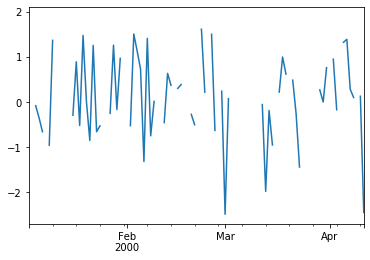

In [174]:
ts2.plot()

In [175]:
ts3 = ts2.interpolate()

ts3

2000-01-03    1.582008
2000-01-04    0.750197
2000-01-05   -0.081615
2000-01-06   -0.351499
2000-01-07   -0.657557
                ...   
2000-04-07    0.284532
2000-04-08    0.101669
2000-04-09    0.115216
2000-04-10    0.128762
2000-04-11   -2.442884
Freq: D, Length: 100, dtype: float64

In [176]:
ts3.count()

100

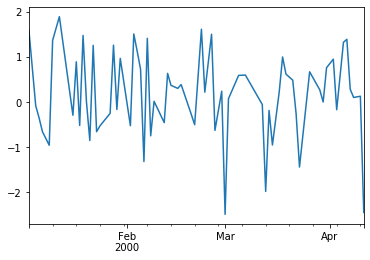

In [177]:
ts3.plot()

O método interpolate pode levar em consideração os valores dos índices (caso eles não sejam regularmente intervalados):

In [178]:
ser = pd.Series([0.0, np.nan, 10], index=[0., 1., 10.])

ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [179]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [180]:
ser.interpolate(
    method='values'
)

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

Também é possível interpolar *DataFrames*:

In [181]:
dfi = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

dfi

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [182]:
dfi.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


O argumento *method* flexibiliza *interpolate* para poder usar diferentes métodos de interpolação:

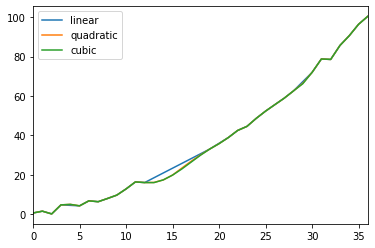

In [183]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ['linear', 'quadratic', 'cubic']

dfi = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

dfi.plot()

## Removendo rótulos

Caso a intenção ao usar *reindex* seja apenas remover certos rótulos, o ideal é usar o método *drop*:

In [184]:
df

,one,two,three
a,0.010668,-0.923932,NaN
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
d,NaN,-0.690736,0.026996


In [185]:
df.drop(['a', 'd'], axis=0)

,one,two,three
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970


In [186]:
df.reindex(
    df.index.difference(
        ['a', 'd']
    )
)  # o mesmo resultado, mas usando reindex

,one,two,three
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970


In [187]:
df.drop(['one'], axis=1)

,two,three
a,-0.923932,NaN
b,-1.308106,-0.816816
c,0.749683,0.654970
d,-0.690736,0.026996


## Renomeando rótulos

Para renomear índices e colunas, *pandas* fornece o método *rename()*, que pode receber como parâmetros um dicionário, uma *Series* ou uma função. Caso uma função seja usada, ela deve retornar um valor único e válido para cada rótulo renomeado.

In [188]:
s

a    0.964893
b   -0.901757
c   -1.566555
d   -1.327085
e   -0.379298
dtype: float64

In [189]:
s.rename(str.upper)

A    0.964893
B   -0.901757
C   -1.566555
D   -1.327085
E   -0.379298
dtype: float64

Ao renomear usando um mapeamento, os rótulos que não forem especificados não são renomeados. Além disso, se o mapeamento contiver rótulos inexistentes, eles são apenas ignorados sem erro.

In [190]:
df

,one,two,three
a,0.010668,-0.923932,NaN
b,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
d,NaN,-0.690736,0.026996


In [191]:
df.rename(
    columns={'one': 'foo', 'two': 'bar'},
    index={'a': 'apple', 'b': 'banana', 'd': 'durian'}
)

,foo,bar,three
apple,0.010668,-0.923932,NaN
banana,-0.278414,-1.308106,-0.816816
c,1.106831,0.749683,0.654970
durian,NaN,-0.690736,0.026996


## Substituindo valores

Frequentemente é necessário substituir certos valores em uma *DataFrame* ou *Series*. O método *replace* é uma forma simples e eficiente de realizar essa operação. Em uma *Series*, é possível substituir um único valor ou uma lista de valores por outros valores:

In [192]:
ser = pd.Series([0., 1., 2., 3., 4.])

ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [193]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

Também é possível especificar um dicionário de substituições:

In [194]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

Para *DataFrames*, é possível determinar substituições por coluna:

In [195]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [196]:
df.replace({'a': [0, 2], 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,100,7
3,3,8
4,4,9


Ao invés de substituir por valores específicos, é possível tratar todos os valores dados como faltantes e preencher ou interpolar:

In [197]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [198]:
ser.replace([2, 3], method='ffill')

0    0.0
1    1.0
2    1.0
3    1.0
4    4.0
dtype: float64

## Aplicando funções

Funções arbitrárias podem ser aplicadas a um eixo de uma *DataFrame* usando o método *apply()*, que recebe um argumento opcional de eixo (*axis*).

In [199]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,-0.844214,-0.313508,NaN
b,0.000010,0.771012,1.467678
c,0.542353,-1.868091,-0.335677
d,NaN,1.731185,0.611341


In [200]:
df.apply(np.mean)

one     -0.100617
two      0.080149
three    0.581114
dtype: float64

In [201]:
df.mean()  # equivalente ao resultado acima

one     -0.100617
two      0.080149
three    0.581114
dtype: float64

In [202]:
df.apply(np.mean, axis=1)

a   -0.578861
b    0.746233
c   -0.553805
d    1.171263
dtype: float64

In [203]:
df.mean(axis=1)  # equivalente ao resultado acima

a   -0.578861
b    0.746233
c   -0.553805
d    1.171263
dtype: float64

In [204]:
df.apply(lambda x: x.max() - x.min())

one      1.386566
two      3.599275
three    1.803355
dtype: float64

In [205]:
df.apply(np.exp)

,one,two,three
a,0.429895,0.730878,NaN
b,1.000010,2.161952,4.339148
c,1.720049,0.154418,0.714854
d,NaN,5.647340,1.842901


O tipo de retorno da função usada no *apply()* influencia o tipo da saída. Se a função aplicada retornar uma *Series*, o resultado será uma *DataFrame*, caso contrário, o resultado será uma *Series*. O método *apply* pode ser usado de formas criativas para responder perguntas sobre um conjunto de dados. Por exemplo: suponha que queiramos saber a data onde o valor mínimo ocorreu para cada coluna:

In [206]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3), 
    columns=['A', 'B', 'C'],
    index=pd.date_range('1/1/2000', 
                        periods=1000)
)


tsdf.apply(lambda x: x.idxmax())

A   2000-10-26
B   2000-02-10
C   2001-02-25
dtype: datetime64[ns]

Também pode ser útil passar argumentos posicionais ou nomeados para o método *apply*. Exemplo:

In [207]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [208]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,one,two,three
a,-1.948071,-1.771169,NaN
b,-1.666663,-1.409663,-1.177441
c,-1.485882,-2.289364,-1.778559
d,NaN,-1.089605,-1.462886


Por último, *apply* pode receber o argumento *raw*, que é *False* por padrão. Caso ele seja passado como *True*, cada linha ou coluna é convertido para um objeto *array* de *NumPy* antes de realizar as operações o que pode trazer um impacto positivo de performance, caso as funcionalidades de indexação sejam desnecessárias.